# Accessing the project directory on my Google Drive  

In [1]:
import os
from google.colab import drive

drive.mount('/drive', force_remount=False)
project_dir = "/drive/My Drive/RNNSeq2Seq/"

# change working directory to project_dir
os.chdir(project_dir)

Mounted at /drive


# Dependencies

In [2]:
from scripts.model import *
from scripts.dataloader import create_dataloader
from scripts.utils import *
from scripts.pytorch_utils import *
import matplotlib.pyplot as plt

# Helper function to help visualize 

In [3]:
def plot_log(log):
    len_range = len(log) -1 if "Best eval accu" in log else len(log)
    epoch_nums, train_loss, dev_loss = [], [], []
    train_acc, dev_acc = [], []

    for epoch in range(1, len_range+1):
        epoch_nums.append(epoch)
        train = log[f"Epoch#{epoch}"]["Train"]
        dev = log[f"Epoch#{epoch}"]["Eval"]
        train_loss.append(train['loss'])
        train_acc.append(train['abosulate accuracy'])

        dev_loss.append(dev['loss'])
        dev_acc.append(dev['abosulate accuracy'])

    ax1 = plt.subplot(211)
    ax1.plot(epoch_nums, train_loss, label="train loss")
    ax1.plot(epoch_nums, dev_loss, label="dev loss")
    ax1.legend()

    ax2 = plt.subplot(212)
    ax2.plot(epoch_nums, train_acc, label="train acc")
    ax2.plot(epoch_nums, dev_acc, label="dev acc")
    ax2.legend()
    plt.show()

In [4]:
folder = "tuning_data/"
experiment_num = 7
shuffle_batch = False

# must be the num of seq per seq length if shuffle_batch is False
# this "tr_batch_size" will be used for dev, and shuffled test sets
tr_batch_size = 250 
dev_batch_size = 500 if not shuffle_batch else tr_batch_size

In [5]:
# setups for training and evaluting

print_freq = 5
acc_threshold = 0.5 # for saving the best trained models 
max_epoch_num = 150 # max num of epoches 
train_acc_exit=0.92 # train acc exit threshold (eval_acc_exit must also be met)
eval_acc_exit=0.92 # dev acc exit threshold (train_acc_exit must also be met)
teacher_forcing_ratio = 1.0 # probability of using real symbol from target sequence for training

# RevStr

In [6]:
train = read_data(join(folder, "RevStr/train.txt"))
dev = read_data(join(folder, "RevStr/dev.txt"))
saved_model_fp = join(project_dir, "notebooks/Hyperparatemers Tuning/RevStr_lstm_model.pt")

train_dl = create_dataloader(train, batch_size=tr_batch_size, shuffle=shuffle_batch)
dev_dl = create_dataloader(dev, batch_size=dev_batch_size, shuffle=shuffle_batch)

## Hyperparameter set 1

In [7]:
in_vocab = ascii_lowercase
out_vocab = ascii_lowercase
in_vocab_size = len(in_vocab) + 2
out_vocab_size = len(out_vocab) + 2

hidden_size = 384
embd_dim = 256
num_layers = 1
rnn_type = "LSTM"
dropout_rate = 0.0
bidirectional = False
use_attention = False
reduction_method = torch.sum

learning_rate = 5e-3
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)


In [8]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.726174420118332, 'abosulate accuracy': 0.0005000000121071935, 'consecutive overlap rate': 0.14349883757531642, 'overlap rate': 0.44020534828305247}
evaluation performance: {'loss': 2.384613135457039, 'abosulate accuracy': 0.0007000000216066838, 'consecutive overlap rate': 0.17698383070528506, 'overlap rate': 0.2914369937032461}

Current epoch: 10, 
training performance: {'loss': 1.119758229702711, 'abosulate accuracy': 0.016300000716000795, 'consecutive overlap rate': 0.23351755365729332, 'overlap rate': 0.6090778514742852}
evaluation performance: {'loss': 2.4043261051177978, 'abosulate accuracy': 0.0014000000548548997, 'consecutive overlap rate': 0.22420104499906301, 'overlap rate': 0.3598154127597809}

Current epoch: 15, 
training performance: {'loss': 0.9027587484568358, 'abosulate accuracy': 0.040400002093520015, 'consecutive overlap rate': 0.2877917781472206, 'overlap rate': 0.6809546560049057}
evaluation performance: {'loss': 2.

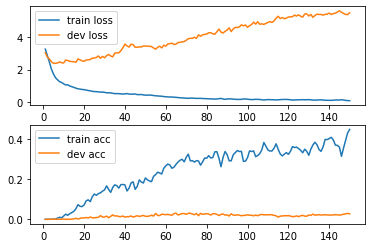

In [9]:
plot_log(log)

## Hyperparameter set 2

In [10]:
hidden_size = 256
embd_dim = 256
num_layers = 1
rnn_type = "LSTM"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-3
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [11]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 1.9342047959566115, 'abosulate accuracy': 0.0005000000353902578, 'consecutive overlap rate': 0.11196835795417429, 'overlap rate': 0.395328389108181}
evaluation performance: {'loss': 2.6190864115953447, 'abosulate accuracy': 0.0007000000274274498, 'consecutive overlap rate': 0.13272209586575628, 'overlap rate': 0.24810847025364638}

Current epoch: 10, 
training performance: {'loss': 1.304901371896267, 'abosulate accuracy': 0.00580000028712675, 'consecutive overlap rate': 0.17930414006114007, 'overlap rate': 0.5572303488850594}
evaluation performance: {'loss': 2.483288398385048, 'abosulate accuracy': 0.0013000000501051546, 'consecutive overlap rate': 0.20330067574977875, 'overlap rate': 0.33249599002301694}

Current epoch: 15, 
training performance: {'loss': 1.048437385261059, 'abosulate accuracy': 0.017700000666081905, 'consecutive overlap rate': 0.228007329441607, 'overlap rate': 0.6314902558922768}
evaluation performance: {'loss': 2.56

## Hyperparameter set 3

In [12]:
hidden_size = 512
embd_dim = 256
num_layers = 1
rnn_type = "GRU"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-4
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [13]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 3.067960184812546, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.014449457626324148, 'overlap rate': 0.10194249358028173}
evaluation performance: {'loss': 3.048705244064331, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.013553410873282701, 'overlap rate': 0.11108655780553818}

Current epoch: 10, 
training performance: {'loss': 2.6634247839450835, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.02024319488555193, 'overlap rate': 0.17876493073999883}
evaluation performance: {'loss': 2.8092134654521943, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.019714700733311476, 'overlap rate': 0.13450016770511866}

Current epoch: 15, 
training performance: {'loss': 2.1001817911863325, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.042951593082398175, 'overlap rate': 0.3143981207162142}
evaluation performance: {'loss': 2.6791839003562927, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0440

KeyboardInterrupt: ignored

## Hyperparameter set 4

In [14]:
hidden_size = 512
embd_dim = 512
num_layers = 1
rnn_type = "GRU"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-3
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [15]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 2.005555382370949, 'abosulate accuracy': 0.00040000000735744833, 'consecutive overlap rate': 0.0982330801896751, 'overlap rate': 0.3814608514308929}
evaluation performance: {'loss': 2.6737648129463194, 'abosulate accuracy': 0.000350000022444874, 'consecutive overlap rate': 0.10005010291934013, 'overlap rate': 0.21652209516614676}

Current epoch: 10, 
training performance: {'loss': 1.7695474177598953, 'abosulate accuracy': 0.0019000000669620932, 'consecutive overlap rate': 0.13291992461308838, 'overlap rate': 0.44141804054379463}
evaluation performance: {'loss': 2.565769785642624, 'abosulate accuracy': 0.00020000000949949026, 'consecutive overlap rate': 0.1228186479769647, 'overlap rate': 0.23477486092597247}

Current epoch: 15, 
training performance: {'loss': 1.6380552008748055, 'abosulate accuracy': 0.0012000000569969416, 'consecutive overlap rate': 0.14434494655579327, 'overlap rate': 0.4664729699492455}
evaluation performance: {'loss

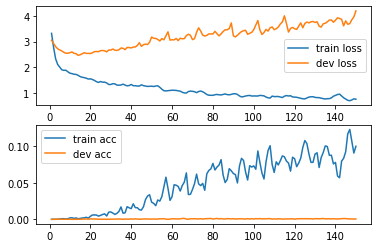

In [16]:
plot_log(log)

# RedStr



In [17]:
train = read_data(join(folder, "RedStr/train.txt"))
dev = read_data(join(folder, "RedStr/dev.txt"))
saved_model_fp = join(project_dir, "notebooks/Hyperparatemers Tuning/RevStr_model.pt")

train_dl = create_dataloader(train, batch_size=tr_batch_size, shuffle=shuffle_batch)
dev_dl = create_dataloader(dev, batch_size=dev_batch_size, shuffle=shuffle_batch)

## Hyperparameter set 1


In [18]:
hidden_size = 384
embd_dim = 256
num_layers = 1
rnn_type = "LSTM"
encoder = Encoder(in_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type, 
                  dropout_rate, bidirectional, 
                  reduction_method)
attention = Attention(hidden_size)
decoder = Decoder(out_vocab_size, hidden_size, 
                  embd_dim, num_layers, rnn_type,
                  attention, use_attention, 
                  dropout_rate)

model = Seq2Seq(encoder, decoder, device).to(device)
model.apply(init_weights)

learning_rate = 5e-3
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [19]:
log = train_and_evaluate(model, train_dl, dev_dl, criterion, optimizer, 
                         saved_model_fp, acc_threshold, print_freq, max_epoch_num, 
                         train_acc_exit, eval_acc_exit, teacher_forcing_ratio)

Current epoch: 5, 
training performance: {'loss': 3.152596527338028, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0012346180141321384, 'overlap rate': 0.03920107614248991}
evaluation performance: {'loss': 3.1527906715869904, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0014955100676161237, 'overlap rate': 0.038608488626778126}

Current epoch: 10, 
training performance: {'loss': 3.145821678638458, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.001330026038340293, 'overlap rate': 0.04097084142267704}
evaluation performance: {'loss': 3.147725284099579, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0015812104851647747, 'overlap rate': 0.03831041408702731}

Current epoch: 15, 
training performance: {'loss': 3.144114929437637, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 0.0015414585621329024, 'overlap rate': 0.042943716421723364}
evaluation performance: {'loss': 3.1495512425899506, 'abosulate accuracy': 0.0, 'consecutive overlap rate': 

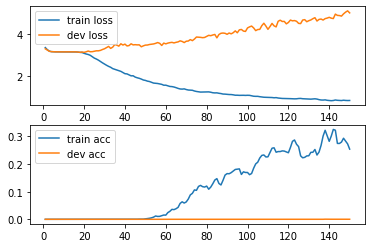

In [20]:
plot_log(log)